# Unsupervised Learning Exercise Using Mall Customers Data

Purpose: Develp model to cluster mall dataset based on income and spending score.

Author: Jordan A. Caraballo-Vega

Version: 2024.03.06

## Import Libraries

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Load dataset

In [3]:
!ls drive/MyDrive/Terminal34/

 animales		        nasa-api.txt
 asteroid-time-series	        puerto-rico-dataset.zip
 Cleaned_DS_Jobs.csv	       'QuickFacts Feb-20-2020.csv'
 climate-change_pri.csv         science-and-technology_pri.csv
 data-science-job-posting.zip   Uncleaned_DS_jobs.csv
 Incidencia_Crime_Map.csv       unit_1_feature_engineering_exercise_data.csv
 Mall_Customers.csv	        unit_1_feature_engineering_exercise_data.csv.zip


In [4]:
customers_df = pd.read_csv('drive/MyDrive/Terminal34/Mall_Customers.csv')

In [5]:
customers_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Basic EDA

<ipython-input-15-e9aa73f9c163>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(customers_df, x='Annual Income (k$)', y='Genre', inner='stick', palette='Dark2')


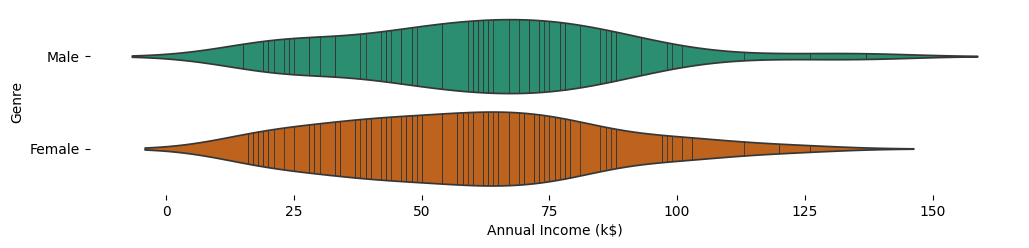

In [15]:
# @title Genre vs Annual Income (k$)

figsize = (12, 1.2 * len(customers_df['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(customers_df, x='Annual Income (k$)', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

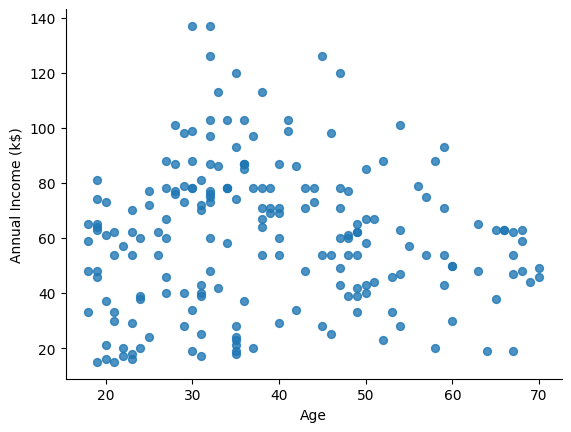

In [16]:
# @title Age vs Annual Income (k$)

customers_df.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

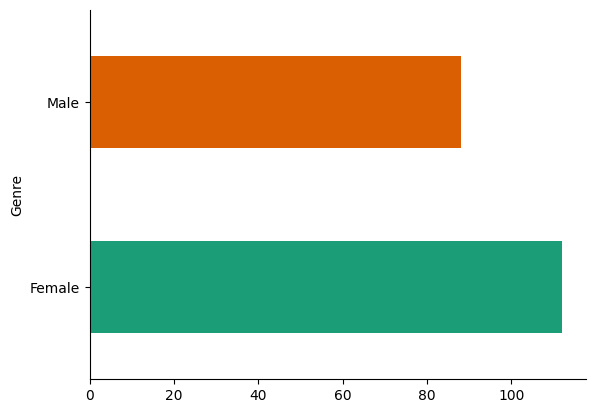

In [17]:
# @title Genre

customers_df.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

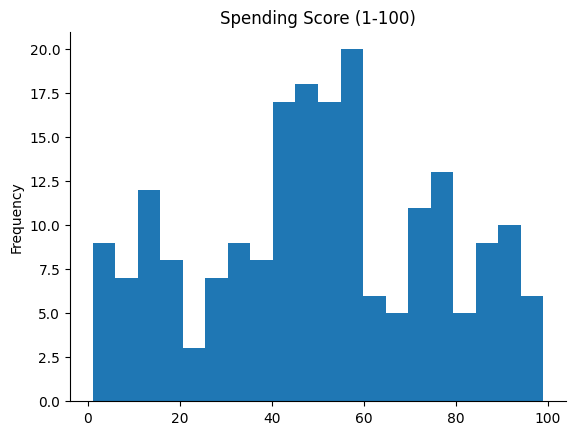

In [18]:
# @title Spending Score (1-100)

customers_df['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

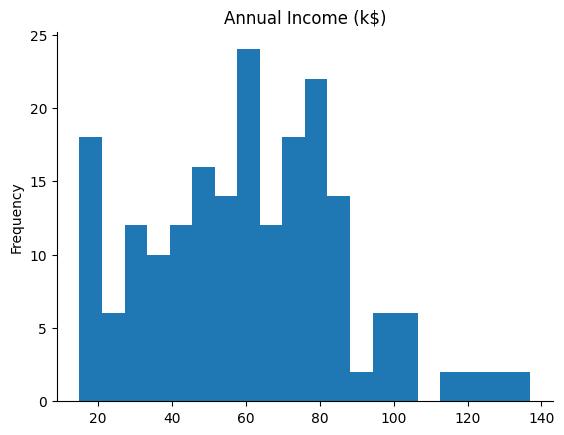

In [19]:
# @title Annual Income (k$)

customers_df['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
customers_df.shape

(200, 5)

## 3. Apply K-means clustering

In [22]:
# Selecting annual income and spending score for clustering
X = customers_df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [47]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [48]:
# Predict the cluster for each data point
labels = kmeans.predict(X)
labels

array([8, 7, 3, 7, 8, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 8, 7, 8, 7, 8, 7,
       3, 7, 3, 7, 8, 0, 8, 7, 3, 7, 3, 7, 3, 7, 3, 7, 8, 7, 8, 7, 8, 0,
       8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 4, 1, 4, 9, 4, 9, 4,
       1, 4, 9, 4, 9, 4, 9, 4, 9, 4, 1, 4, 9, 4, 1, 4, 1, 4, 9, 4, 9, 4,
       9, 4, 9, 4, 9, 4, 1, 4, 9, 4, 1, 4, 9, 4, 1, 4, 9, 4, 9, 4, 9, 4,
       9, 4, 9, 4, 1, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2], dtype=int32)

## 5. Visualize

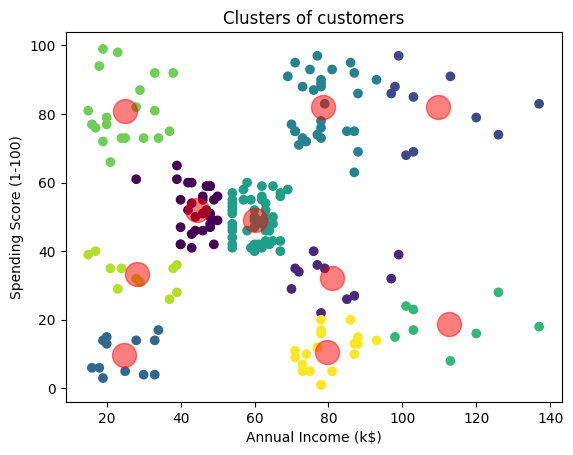

In [49]:
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', alpha=0.5)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 4. Optimal number of clusters

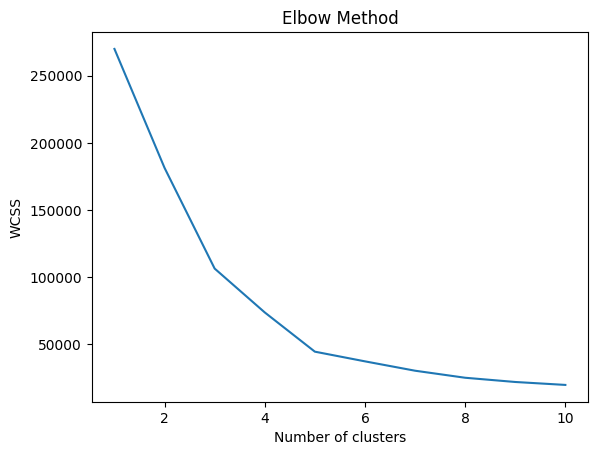

In [36]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    # within-cluster sum of squares (WCSS)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [50]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

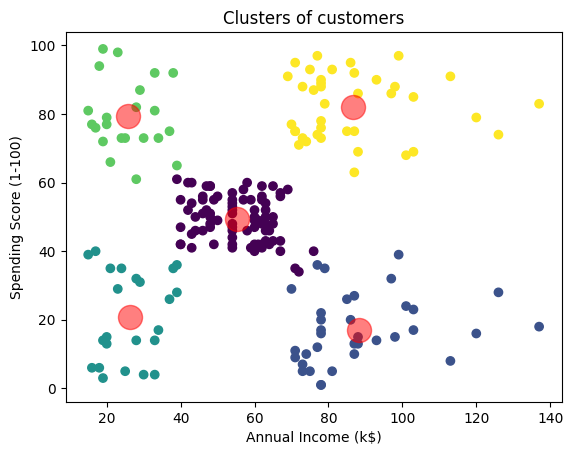

In [51]:
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', alpha=0.5)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()